In [1]:
import json
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import json_normalize

## 1. Data Acquisition

The below code in the data acquisition section was repurposed from this notebook (https://public.paws.wmcloud.org/User:Jtmorgan/data512_a1_example.ipynb) to read in the raw data. 

In [2]:
# endpoint for legacy API
endpoint_legacy = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'

# endpoint for pageviews API
endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

Here I have adjusted the parameters to get the information needed from the legacy and pageviews APIs. 
The legacy data is coming from December 2007 to July 2016 and the pageviews data is coming from July 2016 to September 2021. The data coming from the pageviews API is filtered to only include user data so it does not include spiders/crawlers, though the data coming from the legacy API does include this.

In [3]:
# legacy API for the access method of desktop-site from Dec 2007 - July 2016 
legacy_desktop_200712_201607 = {"project" : "en.wikipedia.org",
                 "access-site" : "desktop-site",
                 "granularity" : "monthly",
                 "start" : "2007120100",
                # the first day of the following month is used to get the data through July
                 "end" : "2016080100"
                    }

In [4]:
# legacy API for the access method of mobile-site from Dec 2007 - July 2016 
legacy_mobile_200712_201607 = {"project" : "en.wikipedia.org",
                 "access-site" : "mobile-site",
                 "granularity" : "monthly",
                 "start" : "2007120100",
                 "end" : "2016080100"
                    }

In [5]:
# Pageviews API for the access method of desktop from July 2015 - Sept 2021
pageviews_desktop_201507_202109 = {"project" : "en.wikipedia.org",
                 "access" : "desktop",
                 "agent" : "user",
                 "granularity" : "monthly",
                 "start" : "2015070100",
                 "end" : "2021100100"
                    }

In [6]:
# Pageviews API for the access method of mobile web from July 2015 - Sept 2021
pageviews_mobileweb_201507_202109 = {"project" : "en.wikipedia.org",
                 "access" : "mobile-web",
                 "agent" : "user",
                 "granularity" : "monthly",
                 "start" : "2015070100",
                 "end" : "2021100100"
                    }

In [7]:
# Pageviews API for the access method of mobile app from July 2015 - Sept 2021
pageviews_mobileapp_201507_202109 = {"project" : "en.wikipedia.org",
                 "access" : "mobile-app",
                 "agent" : "user",
                 "granularity" : "monthly",
                 "start" : "2015070100",
                 "end" : "2021100100"
                    }

In [8]:
# My github and email contact information
headers = {
    'User-Agent': 'https://github.com/geiercc',
    'From': 'geiercc@uw.edu'
}

In [9]:
# api_call takes in an endpoint and parameters and returns a response
def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    
    return response

The naming convention I followed for the api call responses was "api-name_access-method_views". I call the legacy and pageviews API for legacy desktop views, legacy mobile views, pageviews desktop views, pageviews mobile web views, and pageviews mobile app views.

In [10]:
legacy_desktop_views = api_call(endpoint_legacy, legacy_desktop_200712_201607)

legacy_mobile_views = api_call(endpoint_legacy, legacy_mobile_200712_201607)

pageviews_desktop_views = api_call(endpoint_pageviews, pageviews_desktop_201507_202109)

pageviews_mobileweb_views = api_call(endpoint_pageviews, pageviews_mobileweb_201507_202109)

pageviews_mobileapp_views = api_call(endpoint_pageviews, pageviews_mobileapp_201507_202109)

In [11]:
# Double checking to make sure all api calls output a response
# print(legacy_desktop_views)
# print(legacy_mobile_views)
# print(pageviews_desktop_views)
# print(pageviews_mobileweb_views)
# print(pageviews_mobileapp_views)

 Now I save the raw results from the 5 API calls into 5 separate JSON source data files. The naming convention followed here was "apiname_accesstype_firstmonth-lastmonth.json". 

In [12]:
# Legacy desktop raw data
with open("data_raw/legacy_desktop_200712_201607.json", "w") as write_file:
    json.dump(legacy_desktop_views, write_file)

In [13]:
# Legacy mobile raw data
with open("data_raw/legacy_mobile_200712_201607.json", "w") as write_file:
    json.dump(legacy_mobile_views, write_file)

In [14]:
# Pageviews desktop raw data
with open("data_raw/pageviews_desktop_201507_202109.json", "w") as write_file:
    json.dump(pageviews_desktop_views, write_file)  

In [15]:
# Pageviews mobile web raw data
with open("data_raw/pageviews_mobileweb_201507_202109.json", "w") as write_file:
    json.dump(pageviews_mobileweb_views, write_file) 

In [16]:
# Pageviews mobile app raw data
with open("data_raw/pageviews_mobileapp_201507_202109.json", "w") as write_file:
    json.dump(pageviews_mobileapp_views, write_file)

## 2. Data processing

In step two, data processing, I prepare the raw data for analysis by completing some data cleaning and outputting a csv file called en-wikipedia_traffic_200712-202108.csv
The fields included in this csv are year, month, pagecount_all_views, pagecount_desktop_views, pagecount_mobile_views, pageview_all_views, pageview_desktop_views, pageview_mobile_views. More information about the fields can be found in the README file.

Just to be safe, I assume the json files have not been read in so I read in all 5 json files and normalize them into pandas dataframes. I'm using the naming convention "api-name_access-method_df" to name the resultant dataframes.

In [17]:
# Reading in json files and then normalizing json files into 5 seperate dataframes
legacy_desktop = pd.read_json("data_raw/legacy_desktop_200712_201607.json")["items"]
legacy_desktop_df = pd.json_normalize(legacy_desktop)

legacy_mobile = pd.read_json("data_raw/legacy_mobile_200712_201607.json")["items"]
legacy_mobile_df = pd.json_normalize(legacy_mobile)

pageviews_desktop = pd.read_json("data_raw/pageviews_desktop_201507_202109.json")["items"]
pageviews_desktop_df = pd.json_normalize(pageviews_desktop)

pageviews_mobileweb = pd.read_json("data_raw/pageviews_mobileweb_201507_202109.json")["items"]
pageviews_mobileweb_df = pd.json_normalize(pageviews_mobileweb)

pageviews_mobileap = pd.read_json("data_raw/pageviews_mobileapp_201507_202109.json")["items"]
pageviews_mobileap_df = pd.json_normalize(pageviews_mobileap)

Next, for all the data, I separate the value of the timestamp into a four-digit year (YYYY) and a two-digit month (MM) and discard the values for day and hour (DDHH).

In [18]:
# selecting the first 4 characters of the timestamp as the year 
legacy_desktop_df["year"] = legacy_desktop_df["timestamp"].str[:4]
# selecting characters 4-6 of the timestamp as the month
legacy_desktop_df["month"] = legacy_desktop_df["timestamp"].str[4:6]

legacy_mobile_df["year"] = legacy_mobile_df["timestamp"].str[:4]
legacy_mobile_df["month"] = legacy_mobile_df["timestamp"].str[4:6]

pageviews_desktop_df["year"] = pageviews_desktop_df["timestamp"].str[:4]
pageviews_desktop_df["month"] = pageviews_desktop_df["timestamp"].str[4:6]

pageviews_mobileweb_df["year"] = pageviews_mobileweb_df["timestamp"].str[:4]
pageviews_mobileweb_df["month"] = pageviews_mobileweb_df["timestamp"].str[4:6]

pageviews_mobileap_df["year"] = pageviews_mobileap_df["timestamp"].str[:4]
pageviews_mobileap_df["month"] = pageviews_mobileap_df["timestamp"].str[4:6]

Next I rename the views columns so they are consistent for the final csv output. The naming convention for the columns is "api-name_access-method_views".

In [19]:
# renaming count/views columns to final column names
legacy_desktop_df.rename(columns={'count': 'pagecount_desktop_views'}, inplace=True)

legacy_mobile_df.rename(columns={'count': 'pagecount_mobile_views'}, inplace=True)

pageviews_desktop_df.rename(columns={'views': 'pageview_desktop_views'}, inplace=True)

pageviews_mobileweb_df.rename(columns={'views': 'pageview_mobileweb_views'}, inplace=True)

pageviews_mobileap_df.rename(columns={'views': 'pageview_mobileap_views'}, inplace=True)

For the data collected from the Pageviews API, I combine the monthly values for mobile-app and mobile-web to create a total mobile traffic count for each month.

In [20]:
# merging the pageviews API mobile app df and mobile site df where they have the same month and year
# replacing Nan values with 0
page_views_mobile_df = pd.merge(pageviews_mobileweb_df,pageviews_mobileap_df,on = ["month", "year"], how="outer").replace(np.nan, 0)

In [21]:
# adding the pageviews of the mobile app with the mobile site from the new pageviews mobile dataframe
page_views_mobile_df["pageview_mobile_views"] = page_views_mobile_df["pageview_mobileweb_views"] + page_views_mobile_df["pageview_mobileap_views"]

Months with 0 pageviews for a given access method (e.g. desktop-site, mobile-app), are listed as 0 for that value for that (column, month). I am also merging all dataframes into one dataframe.

In [22]:
# merging all dataframes on month and year, and replacing Nans with 0
en_wikipedia_traffic = pd.merge(page_views_mobile_df, pageviews_desktop_df, on = ["month", "year"], how="outer").replace(np.nan, 0)
en_wikipedia_traffic = pd.merge(en_wikipedia_traffic, legacy_mobile_df, on = ["month", "year"], how="outer").replace(np.nan, 0)
en_wikipedia_traffic = pd.merge(en_wikipedia_traffic, legacy_desktop_df, on = ["month", "year"], how="outer").replace(np.nan, 0)

All views for the pagecount API and the pageview API are calculated as the summation of desktop views and mobile views.

In [23]:
# caculating all views for both APIs
en_wikipedia_traffic["pagecount_all_views"] = en_wikipedia_traffic["pagecount_desktop_views"] + en_wikipedia_traffic["pagecount_mobile_views"]
en_wikipedia_traffic["pageview_all_views"] = en_wikipedia_traffic["pageview_desktop_views"] + en_wikipedia_traffic["pageview_mobile_views"]

In [24]:
# selecting the final columns to appear in the csv that are needed for the analysis
en_wikipedia_traffic = en_wikipedia_traffic[["year", "month","pagecount_all_views", "pagecount_desktop_views", "pagecount_mobile_views", "pageview_all_views", "pageview_desktop_views", "pageview_mobile_views"]]

Finally, I ouptut a csv named "en-wikipedia_traffic_200712-202108.csv" to the data_clean folder.

In [25]:
# csv output of merged dataframe
en_wikipedia_traffic.to_csv("data_clean/en-wikipedia_traffic_200712-202108.csv", index=False)

## 3. Analysis

In the analysis section I have visualized the dataset that I created as a time series graph.

In [26]:
# reading in the cleaned csv file
wikipedia_traffic_analysis = pd.read_csv("data_clean/en-wikipedia_traffic_200712-202108.csv")

In [27]:
# Combining year and month fields into one data field to use as the x-axis
wikipedia_traffic_analysis["Date"] = wikipedia_traffic_analysis["year"].astype(str) + "-" + wikipedia_traffic_analysis["month"].astype(str)
wikipedia_traffic_analysis["Date"] = pd.to_datetime(wikipedia_traffic_analysis["Date"])

Note that I have chosen to not graph the months with a view count of 0.

In [28]:
# replacing values of 0 with Nan so that they will not be included in the visualization
wikipedia_traffic_analysis= wikipedia_traffic_analysis.replace(0, np.nan)

I have divided the views by 1,000,000 so as to make the visualization easier to read.

In [29]:
# dividing the views by 1,000,000
wikipedia_traffic_analysis["pagecount_all_views"] = wikipedia_traffic_analysis["pagecount_all_views"] /1000000
wikipedia_traffic_analysis["pagecount_desktop_views"] = wikipedia_traffic_analysis["pagecount_desktop_views"] /1000000
wikipedia_traffic_analysis["pagecount_mobile_views"] = wikipedia_traffic_analysis["pagecount_mobile_views"] /1000000
wikipedia_traffic_analysis["pageview_all_views"] = wikipedia_traffic_analysis["pageview_all_views"] /1000000
wikipedia_traffic_analysis["pageview_desktop_views"] = wikipedia_traffic_analysis["pageview_desktop_views"] /1000000
wikipedia_traffic_analysis["pageview_mobile_views"] = wikipedia_traffic_analysis["pageview_mobile_views"] /1000000

Next, I plot the data. Mobile views are plotted in dark blue for both the legacy and pageviews API, Desktop views are plotted in green for both the legacy and pageviews API, and all views are plotted in black for both the legacy and pageviews API.
The data coming from the pageviews API is described as views in the new definition, shown in the legend.
This image is outputted into the results file as a png titled "en-wikipedia_traffic_200712-202108.png"

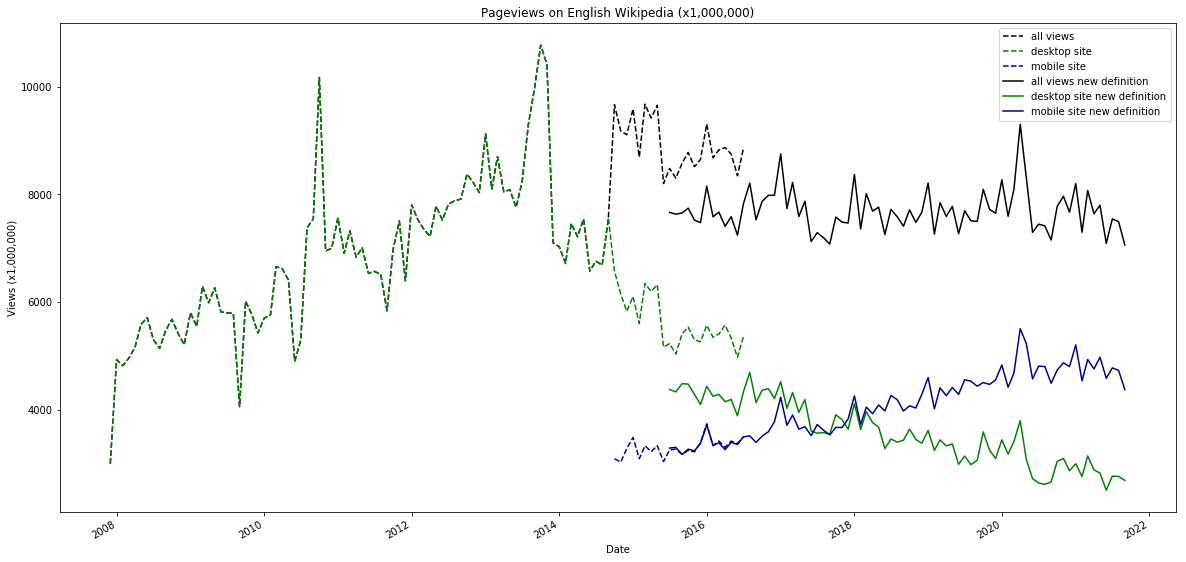

In [30]:
# plotting date on the x-axis and views on the y-axis
# legacy views are distinguised with a dashed line, while pageviews are shown as a solid line
ax = wikipedia_traffic_analysis.plot(x = "Date", y= "pagecount_all_views", color = "k", ls="--", figsize=(20,10), label= "all views")
wikipedia_traffic_analysis.plot(x = "Date" , y = "pagecount_desktop_views", ax=ax, color= "g", ls="--", figsize=(20,10), label= "desktop site")
wikipedia_traffic_analysis.plot(x = "Date" , y = "pagecount_mobile_views", ax=ax, color="#00008B", ls="--", figsize=(20,10), label = "mobile site")
wikipedia_traffic_analysis.plot(x = "Date" , y = "pageview_all_views", ax=ax, color="k", ls="-", figsize=(20,10), label= "all views new definition")
wikipedia_traffic_analysis.plot(x = "Date" , y = "pageview_desktop_views", ax=ax, color="g", ls="-", figsize=(20,10), label= "desktop site new definition")
wikipedia_traffic_analysis.plot(x = "Date" , y = "pageview_mobile_views", ax=ax, color="#00008B", ls="-", figsize=(20,10), label = "mobile site new definition")

# getting rid of scientific notation on the y-axis
plt.ticklabel_format(axis="y", style="plain")
plt.ylabel("Views (x1,000,000)")
plt.title("Pageviews on English Wikipedia (x1,000,000)")
# saving image as a png
plt.savefig("results/en-wikipedia_traffic_200712-202108.png")
plt.show()